# [Kaggle Restaurant Revenue Prediction](https://www.kaggle.com/c/restaurant-revenue-prediction)

## Predict annual restaurant sales based on objective measurements

## Import libraries and data; explore the data

Let's begin by importing the Python libraries and data that we'll need:

In [901]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

In [902]:
train_data = pd.read_csv("train.csv")
train_data = train_data.drop('Id', axis=1)
test_data = pd.read_csv("test.csv")
test_data = test_data.drop('Id', axis=1)

Now for a bit of exploratory data analysis so we can get to know our data:

In [903]:
display(train_data[:10])

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
5,02/12/2010,Ankara,Big Cities,FC,6,6.0,4.5,7.5,8,10,...,5.0,0,0,0,0,0,0,0,0,5017319.0
6,10/11/2010,İstanbul,Big Cities,IL,2,3.0,4.0,4.0,1,5,...,3.0,4,5,2,2,3,5,4,4,5166635.0
7,06/21/2011,İstanbul,Big Cities,IL,4,5.0,4.0,5.0,2,3,...,2.0,0,0,0,0,0,0,0,0,4491607.0
8,08/28/2010,Afyonkarahisar,Other,IL,1,1.0,4.0,4.0,1,2,...,3.0,4,5,5,3,4,5,4,5,4952497.0
9,11/16/2011,Edirne,Other,IL,6,4.5,6.0,7.5,6,4,...,2.5,0,0,0,0,0,0,0,0,5444227.0


In [904]:
display(test_data[:10])

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,...,2.0,3.0,0,0,0,0,0,0,0,0
1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,...,2.0,3.0,0,4,0,0,0,0,0,0
4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,...,5.0,3.0,0,0,0,0,0,0,0,0
5,11/29/2007,Eskişehir,Other,FC,4,4.5,5.0,4.0,2,6,...,2.0,3.0,0,0,0,0,0,0,0,0
6,11/05/2008,Rize,Other,FC,4,2.0,4.0,4.0,2,2,...,1.0,3.0,3,5,4,1,2,0,0,0
7,12/03/2013,Ankara,Big Cities,IL,2,5.0,4.0,5.0,2,3,...,3.0,1.0,3,0,0,0,3,0,4,4
8,05/30/2006,İstanbul,Big Cities,IL,5,4.0,4.0,4.0,1,3,...,5.0,1.0,0,4,0,0,3,5,0,0
9,01/20/2012,İstanbul,Big Cities,IL,15,7.5,6.0,3.0,4,8,...,1.0,2.5,20,2,0,2,24,4,0,3


In [905]:
train_data.describe()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,5.489051,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,1.847561,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,5.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [906]:
test_data.describe()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,4.088030,4.428085,4.215325,4.396025,1.989590,2.881900,5.30051,4.93100,5.251380,5.458970,...,3.233785,3.084000,2.083300,1.193330,1.942640,0.987430,2.108670,1.832830,1.968890,0.973500
std,2.812963,1.428865,0.842161,1.035827,1.065314,1.531429,2.17858,1.71849,1.702632,1.763601,...,2.136694,1.783927,4.309479,2.307944,3.971298,1.534808,4.685414,3.228769,3.805773,1.677267
min,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.00000,1.00000,4.000000,4.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.750000,4.000000,4.000000,1.000000,2.000000,5.00000,4.00000,4.000000,5.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,5.000000,4.000000,4.000000,2.000000,2.000000,5.00000,5.00000,5.000000,5.000000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,5.000000,4.000000,5.000000,2.000000,4.000000,5.00000,5.00000,5.000000,5.000000,...,4.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000
max,15.000000,7.500000,6.000000,7.500000,6.000000,10.000000,10.00000,10.00000,10.000000,10.000000,...,12.500000,10.000000,25.000000,15.000000,25.000000,6.000000,30.000000,15.000000,20.000000,8.000000


In [907]:
train_data.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [908]:
train_data.tail()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0
136,09/01/2009,İstanbul,Big Cities,FC,4,5.0,3.0,5.0,2,2,...,3.0,0,0,0,0,0,0,0,0,6363241.0


In [909]:
train_data.sample(5)

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
77,10/25/2013,Ankara,Big Cities,FC,3,5.0,3.0,5.0,3,4,...,2.0,0,0,0,0,0,0,0,0,1904842.0
59,12/01/2007,İstanbul,Big Cities,FC,4,5.0,4.0,4.0,1,3,...,3.0,0,0,0,0,0,0,0,0,3600467.0
116,03/30/2012,İzmir,Big Cities,FC,2,4.0,4.0,4.0,2,2,...,3.0,0,0,0,0,0,0,0,0,8894598.0
112,03/14/1998,İstanbul,Big Cities,IL,4,5.0,5.0,4.0,1,5,...,3.0,3,2,1,2,2,1,3,3,3784230.0
45,02/02/2012,Antalya,Other,FC,6,6.0,6.0,4.5,2,8,...,7.5,0,0,0,0,0,0,0,0,3752885.0


In [910]:
train_data.keys()

Index(['Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
       'P37', 'revenue'],
      dtype='object')

In [911]:
test_data.keys()

Index(['Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
       'P37'],
      dtype='object')

In [912]:
test_data.keys()

Index(['Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
       'P37'],
      dtype='object')

## Plot the data

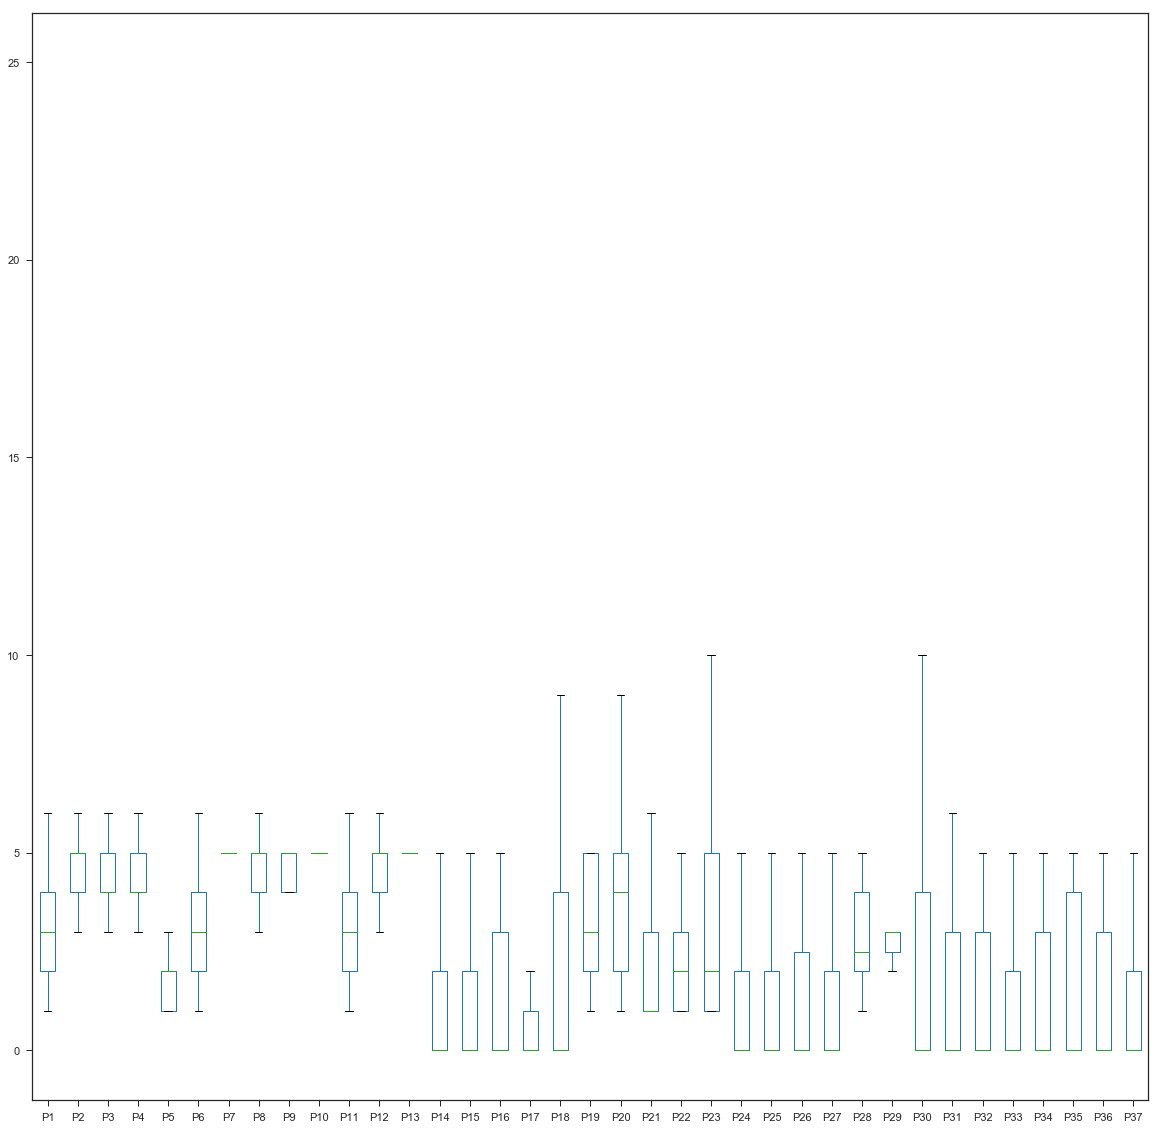

In [913]:
feature_columns = train_data[['P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37']]
feature_columns.plot.box(figsize=(20, 20))

I'm sure there are more creative and informative ways to plot the data, but for now it's time to move on.

## Massage, munge, preprocess, and visualize the data

In [914]:
# Cribbed from https://www.kaggle.com/ani310/restaurant-revenue-prediction/restaurant-revenue
# Format the data so that dates are easier to work with.
# Create a column that contains data about the number of days the restaurant has been open.
# Remove the column that has the restaurant's opening date.

train_data['Open Date'] = pd.to_datetime(train_data['Open Date'], format='%m/%d/%Y')
test_data['Open Date'] = pd.to_datetime(test_data['Open Date'], format='%m/%d/%Y')

train_data['OpenDays'] = ""
test_data['OpenDays'] = ""

date_last_train = pd.DataFrame({'Date':np.repeat(['01/01/2015'], [len(train_data)])})
date_last_test = pd.DataFrame({'Date':np.repeat(['01/01/2015'], [len(test_data)])})

date_last_train['Date'] = pd.to_datetime(date_last_train['Date'], format='%m/%d/%Y')
date_last_test['Date'] = pd.to_datetime(date_last_test['Date'], format='%m/%d/%Y')

train_data['OpenDays'] = date_last_train['Date'] - train_data['Open Date']
test_data['OpenDays'] = date_last_test['Date'] - test_data['Open Date']

train_data['OpenDays'] = train_data['OpenDays'].astype('timedelta64[D]').astype(int)
test_data['OpenDays'] = test_data['OpenDays'].astype('timedelta64[D]').astype(int)

train_data = train_data.drop('Open Date', axis=1)
test_data = test_data.drop('Open Date', axis=1)

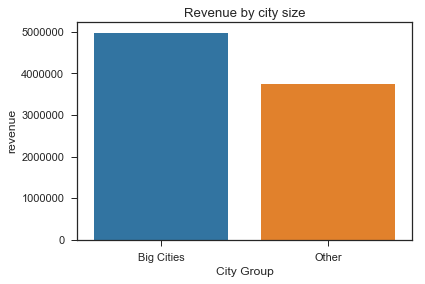

In [915]:
# Compare the revenue generated by the restaurants in Big Cities vs Other:
city_perc = train_data [["City Group", "revenue"]].groupby(['City Group'], as_index=False).mean()
sns.barplot(x='City Group', y='revenue', data=city_perc)
plt.title("Revenue by city size")

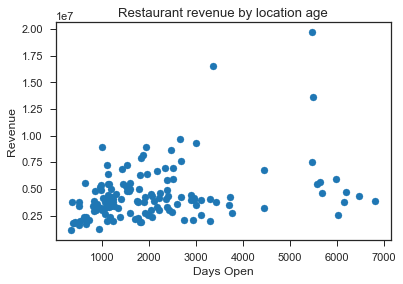

In [916]:
# Convert data from 'City Group' and create columns of indicator variables for 'Big Cities' or 'Other':
city_group_dummy = pd.get_dummies(train_data['City Group'])
train_data = train_data.join(city_group_dummy)
city_group_dummy_test = pd.get_dummies(test_data['City Group'])
test_data = test_data.join(city_group_dummy_test)

train_data = train_data.drop('City Group', axis=1)
test_data = test_data.drop('City Group', axis=1)

# Create scatterplot showing how long a restaurant has been open impacts revenue.
# This will also show any outliers.
plt.scatter(train_data['OpenDays'], train_data['revenue'])
plt.xlabel("Days Open")
plt.ylabel("Revenue")
plt.title("Restaurant revenue by location age")

## Find the relevant features

In [917]:
from sklearn.feature_selection import SelectFromModel
# from sklearn.linear_model import LassoCV
from sklearn.ensemble import ExtraTreesClassifier

X_train = train_data.iloc[:, 2:]
y = train_data['revenue']
print("X_train.shape: {}".format(X_train.shape))
clf = ExtraTreesClassifier()
clf = clf.fit(X_train, y)
print("clf.feature_.importances_: \n{}".format(clf.feature_importances_))
model = SelectFromModel(clf, prefit=True)
print(model)
X_train_new = model.transform(X_train)
print("X_train_new.shape: {}".format(X_train_new.shape))
X_train_new = pd.DataFrame(X_train_new)
print(X_train_new[:5])

X_train.shape: (137, 41)
clf.feature_.importances_: 
[ 0.05220588  0.04852941  0.03235294  0.03161765  0.03602941  0.03897059
  0.0125      0.02867647  0.03235294  0.01911765  0.04044118  0.01544118
  0.01985294  0.01323529  0.00808824  0.01323529  0.0125      0.00808824
  0.03455882  0.03676471  0.02647059  0.04264706  0.03014706  0.01397059
  0.01102941  0.01470588  0.0125      0.0375      0.02941176  0.0125
  0.01323529  0.01764706  0.01029412  0.00882353  0.00882353  0.01176471
  0.0125      0.06397059  0.05441176  0.01691176  0.01617647]
SelectFromModel(estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
        prefit=True, threshold=None)
X_train_ne

## Try various machine learning algorithms  
Let's try on some algorithms and see how they fit and predict:

### [sklearn.ensemble.RandomForestRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)

Also cribbed from [Kaggle](https://www.kaggle.com/ani310/restaurant-revenue-prediction/restaurant-revenue).

In [918]:
from sklearn.ensemble import RandomForestRegressor

# Tweak seaborn visualizations and adapt to Jupyter notebooks:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Make dataframes for train and test:
X_train = pd.DataFrame({'OpenDaysLog':train_data['OpenDays'].apply(np.log),
                       'Big Cities':train_data['Big Cities'], 'Other':train_data['Other'],
                       'P2':train_data['P2'], 'P8':train_data['P8'], 'P22':train_data['P22'],
                       'P24':train_data['P24'], 'P28':train_data['P28'], 'P26':train_data['P26']})

y_train = train_data['revenue'].apply(np.log)

X_test = pd.DataFrame({'OpenDaysLog':test_data['OpenDays'].apply(np.log),
                       'Big Cities':test_data['Big Cities'], 'Other':test_data['Other'],
                       'P2':test_data['P2'], 'P8':test_data['P8'], 'P22':test_data['P22'],
                       'P24':test_data['P24'], 'P28':test_data['P28'], 'P26':test_data['P26']})

# Time to build the models and make some predictions:
from sklearn import linear_model

cls = RandomForestRegressor(n_estimators=150)
cls.fit(X_train, y_train)
pred = cls.predict(X_test)
pred = np.exp(pred)
pred

array([ 3616976.80150155,  3149172.54148857,  2366280.62724696, ...,
        2638716.5229859 ,  3040058.04082682,  5023456.25697234])

In [919]:
cls.score(X_train, y_train)

0.86848099968307868

How to format the data for the Kaggle contest submission based on the sampleSubmission.csv file:

In [920]:
test_data = pd.read_csv("test.csv")
submission = pd.DataFrame({
    "Id": test_data["Id"],
    "Prediction": pred
})
# submission.to_csv('RandomForestSimple.csv', header=True, index=False)


### [sklearn.neighbors.KNeighborsRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

In [921]:
from sklearn.neighbors import KNeighborsRegressor

# Use dataframes from sklearn.ensemble.RandomForestRegressor example above.

knn_cls = KNeighborsRegressor(n_neighbors=2)
knn_cls.fit(X_train, y_train)
knn_pred = knn_cls.predict(X_test)
knn_pred = np.exp(knn_pred)
knn_cls.score(X_train, y_train)

0.64188056106057267

### [sklearn.linear_model.LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [922]:
from sklearn.linear_model import LinearRegression

# Use dataframes from sklearn.ensemble.RandomForestRegressor example above.

lr_cls = LinearRegression()
lr_cls.fit(X_train, y_train)
lr_pred = lr_cls.predict(X_test)
lr_pred = np.exp(lr_pred)
lr_cls.score(X_train, y_train)

0.28226259797741116

### [sklearn.neural_network.MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)

In [923]:
from sklearn.neural_network import MLPRegressor

mlp_cls = MLPRegressor(solver='lbfgs')
mlp_cls.fit(X_train, y_train)
mlp_pred = mlp_cls.predict(X_test)
mlp_pred = np.exp(mlp_pred)
mlp_cls.score(X_train, y_train)

0.52375431831298935

### [Restaurant Revenue Prediction Kaggle solution](http://blog.bikashagrawal.com.np/2015/11/21/restaurant-revenue-prediction-kaggle-solution/)

This next exercise is from a blog post (linked above) by Bikash Agrawal.

In [924]:
import datetime
%pylab inline

from sklearn.model_selection import LeaveOneOut
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier 

# Regressors considered:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
# Regressor chosen by the author for final submission:
from sklearn.linear_model import Ridge

Populating the interactive namespace from numpy and matplotlib


/Users/benjamingrove/.pyenv/versions/3.6.1/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf', 'grid', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [925]:
# Kaggle added ~311.5 "fake" data points to the test for each real data point.
# Dividing by this number gives more accurate counts of the "real" data in the test set.
FAKE_DATA_RATIO = 311.5
# Set a random seed:
SEED = 0

# Read in the data provided by Kaggle:
train = pd.read_csv('train.csv', index_col=0, parse_dates=[1])
test = pd.read_csv('test.csv', index_col=0, parse_dates=[1])
print("Training data dimensions: \n{}".format(train.shape))
print("Test data dimensions: \n{}".format(test.shape))

Training data dimensions: 
(137, 42)
Test data dimensions: 
(100000, 41)


Concatenate the train and test data together into a single dataframe to pre-process and featurize both consistently:

In [926]:
df = pd.concat((test, train), ignore_index=True)
df.describe()

,P1,P10,P11,P12,P13,P14,P15,P16,P17,P18,...,P35,P36,P37,P4,P5,P6,P7,P8,P9,revenue
count,100137.000000,100137.000000,100137.000000,100137.000000,100137.000000,100137.000000,100137.000000,100137.000000,100137.000000,100137.000000,...,100137.000000,100137.000000,100137.000000,100137.000000,100137.000000,100137.000000,100137.000000,100137.000000,100137.000000,1.370000e+02
mean,4.087930,5.459011,3.311653,5.061765,5.086621,1.280276,1.305641,1.747336,1.156715,1.708789,...,1.833099,1.969222,0.973696,4.395992,1.989614,2.882551,5.300678,4.931304,5.251645,4.453533e+06
std,2.813085,1.763709,2.067903,1.765647,0.979414,2.497106,2.167272,3.172481,2.432137,3.030907,...,3.229052,3.806280,1.677427,1.035796,1.065518,1.532502,2.178739,1.718699,1.702825,2.576072e+06
min,1.000000,4.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.149870e+06
25%,2.000000,5.000000,2.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,2.999068e+06
50%,3.000000,5.000000,3.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,2.000000,2.000000,5.000000,5.000000,5.000000,3.939804e+06
75%,4.000000,5.000000,4.000000,5.000000,5.000000,2.000000,2.000000,3.000000,2.000000,4.000000,...,4.000000,3.000000,2.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,5.166635e+06
max,15.000000,10.000000,10.000000,10.000000,7.500000,15.000000,10.000000,15.000000,15.000000,15.000000,...,15.000000,20.000000,8.000000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,1.969694e+07


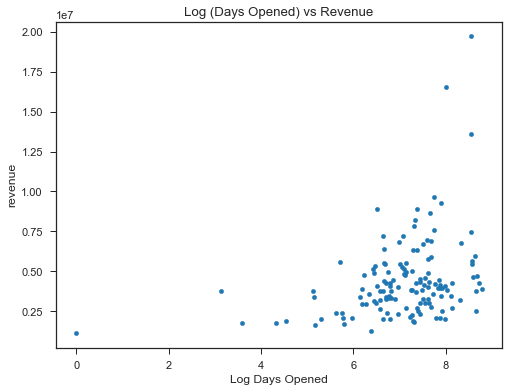

In [927]:
# Convert date strings to "days open" numerical value:
df["Open Date"] = df["Open Date"].apply(pd.to_datetime)
last_date = df["Open Date"].max()
# Create a datetime delta object:
df["Open Date"] = last_date - df["Open Date"]
# Convert the delta object to an int:
df["Open Date"] = df["Open Date"].dt.days + 1

# Scale "days since opening" so that the marginal impact decreases over time.
# This and the similar log transform of City Count below are the modifications
# that were not in the official competition submission.
df["Log Days Opened"] = df["Open Date"].apply(np.log)
df = df.drop(["Open Date"], axis=1)

# Resize plots:
pylab.rcParams['figure.figsize'] = (8, 6)
df[["Log Days Opened", "revenue"]].plot(x="Log Days Opened", y="revenue",
                                       kind='scatter', title="Log (Days Opened) vs Revenue")

/Users/benjamingrove/.pyenv/versions/3.6.1/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


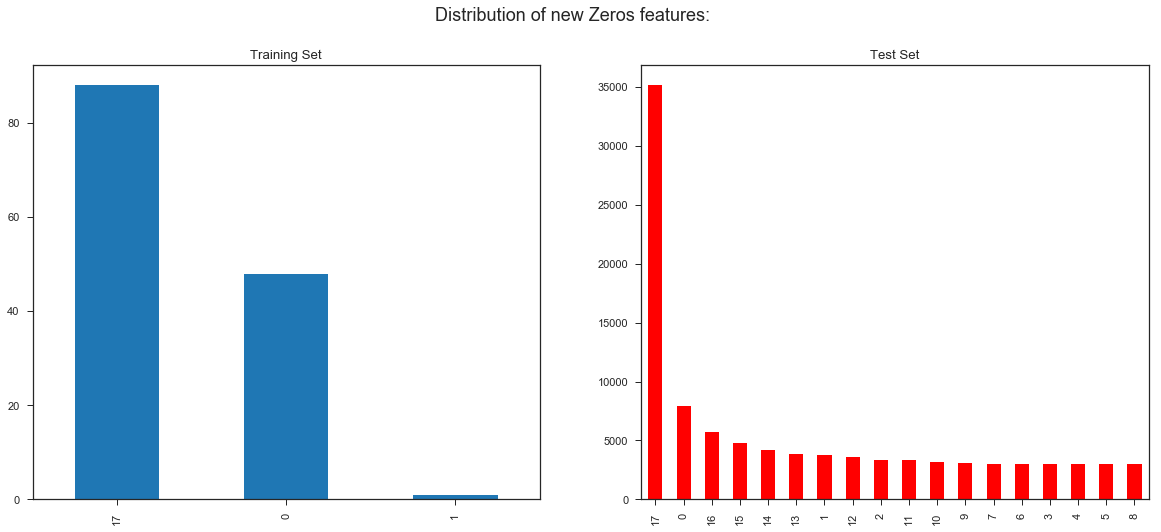

In [928]:
# There is a certain set of columns that are either all zero or all non-zero.
# We have added a feature to mark this -- the 'zeros' feature will be 17 for
# these rows and 0 or 1 for the rows which are rarely or never zero.
# Here are the features with the notable zero behavior:
zero_cols = ['P14', 'P15', 'P16', 'P17', 'P18', 'P24', 'P25', 'P26', 'P27',
             'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37']

# We make a feature that holds this count of zero columns in the above list:
df['zeros'] = (df[zero_cols] == 0).sum(1)

pylab.rcParams['figure.figsize'] = (20, 8)
fig, axs = plt.subplots(1,2)
fig.suptitle("Distribution of new Zeros features:", fontsize=18)
# There is only one row with a zero count between 0 and 17 in the training set:
df['zeros'].ix[pd.notnull(df.revenue)].value_counts().plot(
                title="Training Set", kind='bar', ax=axs[0])
# In the test set, however, there are many rows with an intermediate count of zeros.
# This is probably an artifact of how the fake test data was generated, and might
# indicate that conditional dependence between columns was not preserved.
df['zeros'].ix[pd.isnull(df.revenue)].value_counts().plot(
                title="Test Set", kind='bar', ax=axs[1], color='red')

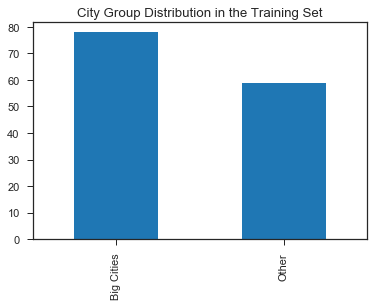

In [929]:
# Here we convert two categorical variables, "Restaurant Type", and "City
# Group (Size)" to dummy variables:
pylab.rcParams['figure.figsize'] = (6, 4)

# The two categories of City Group both appear very frequently:
train["City Group"].value_counts().plot(
    title="City Group Distribution in the Training Set", kind='bar')

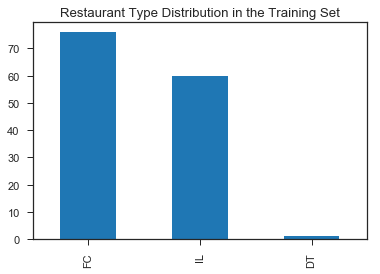

In [930]:
# Two of the four Restaurant Types (DT and MB) are very rare:
train["Type"].value_counts().plot(
    title="Restaurant Type Distribution in the Training Set", kind='bar')

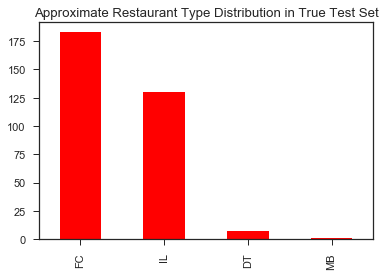

In [931]:
(test["Type"].value_counts() / FAKE_DATA_RATIO).plot(
    title="Approximate Restaurant Type Distribution in True Test Set",
    kind='bar', color='red')

In [932]:
df = df.join(pd.get_dummies(df['City Group'], prefix="CG"))
df = df.join(pd.get_dummies(df['Type'], prefix="T"))
# Since only n-1 columns are needed to binarize n categories, drop one
# of the new columns and drop the original columns.
# In addition, drop the rare restaurant types.
df = df.drop(["City Group", "Type", "CG_Other", "T_MB", "T_DT"], axis=1)
print(df.shape)
df.describe(include='all')

(100137, 44)


,City,P1,P10,P11,P12,P13,P14,P15,P16,P17,...,P6,P7,P8,P9,revenue,Log Days Opened,zeros,CG_Big Cities,T_FC,T_IL
count,100137,100137.000000,100137.000000,100137.000000,100137.000000,100137.000000,100137.000000,100137.000000,100137.000000,100137.000000,...,100137.000000,100137.000000,100137.000000,100137.000000,1.370000e+02,100137.000000,100137.000000,100137.000000,100137.000000,100137.000000
unique,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,İstanbul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,34137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.087930,5.459011,3.311653,5.061765,5.086621,1.280276,1.305641,1.747336,1.156715,...,2.882551,5.300678,4.931304,5.251645,4.453533e+06,7.099481,11.188562,0.492825,0.570169,0.404516
std,NaN,2.813085,1.763709,2.067903,1.765647,0.979414,2.497106,2.167272,3.172481,2.432137,...,1.532502,2.178739,1.718699,1.702825,2.576072e+06,1.100309,6.131762,0.499951,0.495054,0.490801
min,NaN,1.000000,4.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,4.000000,1.149870e+06,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,2.000000,5.000000,2.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,5.000000,4.000000,4.000000,2.999068e+06,6.495266,6.000000,0.000000,0.000000,0.000000
50%,NaN,3.000000,5.000000,3.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,5.000000,5.000000,5.000000,3.939804e+06,7.265430,13.000000,0.000000,1.000000,0.000000
75%,NaN,4.000000,5.000000,4.000000,5.000000,5.000000,2.000000,2.000000,3.000000,2.000000,...,4.000000,5.000000,5.000000,5.000000,5.166635e+06,7.826842,17.000000,1.000000,1.000000,1.000000


In [933]:
# Replace city names with the count of their frequency in the training +
# estimated frequency in the test set.
city_counts = (test["City"].value_counts() /
              FAKE_DATA_RATIO).add(train["City"].value_counts(), fill_value=0)
df["City"] = df["City"].replace(city_counts)
print("Some example estimated counts of restaurants per city: \n{}".format(
                                            city_counts.head()))

Some example estimated counts of restaurants per city: 
Adana             11.070626
Afyonkarahisar     2.062600
Aksaray            2.086677
Amasya             1.000000
Ankara            46.993579
Name: City, dtype: float64


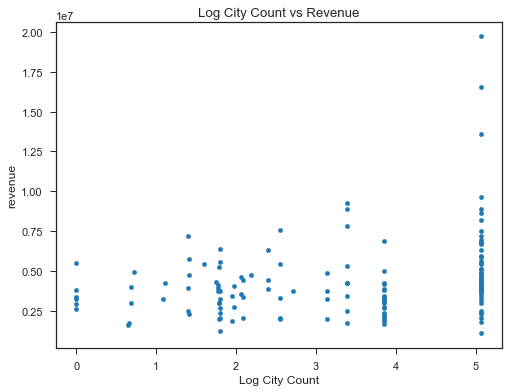

In [934]:
# Take the natural logarithm of city count so that the marginal effect decreases:
df["Log City Count"] = df["City"].apply(np.log)
df = df.drop(["City"], axis=1)

# The last vertical spread of points below are restaurants in Istanbul.
pylab.rcParams['figure.figsize'] = (8, 6)
df[["Log City Count", "revenue"]].plot(x="Log City Count", y="revenue",
                kind='scatter', title="Log City Count vs Revenue")

Now is the time for us to impute values for the rare restaurant types (DT and MB).  
Instead of trying to predict with values that appear only 1 or 0 times in the training set, we will replace them with one of the other commonly appearing categories by fitting a model that predicts which common category they "should" be.

In [935]:
# tofit are the rows in the training set that belong to one of the common restaurant types:
tofit = df.ix[((df.T_FC==1) | (df.T_IL==1)) & (pd.notnull(df.revenue))]
# tofill are rows in either train or test that belong to one of the rare types:
tofill = df.ix[((df.T_FC==0) & (df.T_IL==0))]
print("Type training set shape: \n{}".format(tofit.shape))
print("Data to impute: \n{}".format(tofill.shape))

Type training set shape: 
(136, 44)
Data to impute: 
(2535, 44)


/Users/benjamingrove/.pyenv/versions/3.6.1/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [936]:
# Restaurants with type FC are labeled 1, those with type IL are labeled 0.
y = tofit.T_FC

# Drop the label columns and revenue (which is not in the test set):
X = tofit.drop(["T_FC", "T_IL", "revenue"], axis=1)

Here we can define and train a model to impute restaurant type.  
The grid below just has a range of values that the author has found to work well with random forest type models (of which ExtraTrees is one).

In [937]:
model_grid = {'max_depth': [None, 8], 'min_samples_split': [4,9,16],
             'min_samples_leaf': [1,4], 'max_features': ['sqrt', 0.5, None]}
type_model = ExtraTreesClassifier(n_estimators=25, random_state=SEED)

grid = RandomizedSearchCV(type_model, model_grid, n_iter=10, cv=5, scoring="roc_auc")
grid.fit(X, y)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=25, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_depth': [None, 8], 'min_samples_split': [4, 9, 16], 'min_samples_leaf': [1, 4], 'max_features': ['sqrt', 0.5, None]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring='roc_auc', verbose=0)

In [938]:
print("Best parameters for Type Model: \n{}".format(grid.best_params_))

Best parameters for Type Model: 
{'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 8}


In [939]:
type_model.set_params(**grid.best_params_)
type_model.fit(X, y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=8, max_features=None, max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=9, min_weight_fraction_leaf=0.0,
           n_estimators=25, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [940]:
imputations = type_model.predict(tofill.drop(["T_FC", "T_IL", "revenue"], axis=1))
df.loc[(df.T_FC==0) & (df.T_IL==0), "T_FC"] = imputations
df = df.drop(["T_IL"], axis=1)
df[:7]

,P1,P10,P11,P12,P13,P14,P15,P16,P17,P18,...,P6,P7,P8,P9,revenue,Log Days Opened,zeros,CG_Big Cities,T_FC,Log City Count
0,1,5,5,3,4.0,0,0,0,2,0,...,2,5,4,5,NaN,7.003065,16,0,1,-0.004827
1,3,4,2,4,5.0,0,0,0,0,0,...,2,5,3,4,NaN,6.951772,17,0,0,1.954359
2,3,5,4,5,5.0,0,0,0,0,0,...,2,5,4,4,NaN,4.477337,17,1,1,3.850011
3,2,4,3,4,5.0,0,0,0,0,4,...,3,5,4,5,NaN,5.579730,15,0,0,2.708692
4,2,4,3,5,4.0,0,0,0,0,0,...,2,5,4,5,NaN,5.187386,17,0,1,0.723967
5,4,10,2,5,7.5,0,0,0,0,0,...,6,5,5,10,NaN,7.718685,17,0,1,1.773128
6,4,5,3,5,5.0,1,0,0,1,0,...,2,5,4,5,NaN,7.553811,8,0,1,0.102145


In [941]:
print("% labeled FC in the training set: \n{}".format(df.T_FC.mean()))
print("% of imputed values labeled FC: \n{}".format(np.mean(imputations)))

% labeled FC in the training set: 
0.587724817000709
% of imputed values labeled FC: 
0.693491124260355


Now we can binarize the "P" columns with dummy variables:

In [942]:
print("Pre-binarizing columns: {}".format(len(df.columns)))
for col in df.columns:
    if col[0] == 'P':
        print(col, len(df[col].unique()), "Unique Values")
        df = df.join(pd.get_dummies(df[col], prefix=col))
        df = df.drop([col, df.columns[-1]], axis=1)
print("Post-binarizing columns: {}".format(len(df.columns)))

Pre-binarizing columns: 43
P1 9 Unique Values
P10 4 Unique Values
P11 8 Unique Values
P12 7 Unique Values
P13 5 Unique Values
P14 10 Unique Values
P15 9 Unique Values
P16 10 Unique Values
P17 10 Unique Values
P18 9 Unique Values
P19 9 Unique Values
P2 9 Unique Values
P20 9 Unique Values
P21 9 Unique Values
P22 5 Unique Values
P23 9 Unique Values
P24 9 Unique Values
P25 9 Unique Values
P26 10 Unique Values
P27 10 Unique Values
P28 9 Unique Values
P29 8 Unique Values
P3 8 Unique Values
P30 10 Unique Values
P31 10 Unique Values
P32 10 Unique Values
P33 7 Unique Values
P34 11 Unique Values
P35 8 Unique Values
P36 10 Unique Values
P37 8 Unique Values
P4 7 Unique Values
P5 7 Unique Values
P6 8 Unique Values
P7 7 Unique Values
P8 8 Unique Values
P9 5 Unique Values
Post-binarizing columns: 279


To finish up our data preprocessing, we need to scale all input features to between 0 and 1 (this is especially important for KNN or SVM(SVR) models.  
However, we don't want to scale the output, so we'll temporarily 'drop' it.

In [943]:
min_max_scaler = MinMaxScaler()
rev = df.revenue
df = df.drop(['revenue'], axis=1)
df = pd.DataFrame(data=min_max_scaler.fit_transform(df), columns=df.columns, index=df.index)
df = df.join(rev)
# Now that preprocessing is finished, let's have a look at the data before modeling with it:
df.describe()

,Log Days Opened,zeros,CG_Big Cities,T_FC,Log City Count,P1_1,P1_2,P1_3,P1_4,P1_5,...,P8_3,P8_4,P8_5,P8_6,P8_8,P9_4,P9_5,P9_6,P9_8,revenue
count,100137.000000,100137.000000,100137.000000,100137.000000,100137.000000,100137.000000,100137.000000,100137.000000,100137.000000,100137.000000,...,100137.000000,100137.000000,100137.000000,100137.000000,100137.000000,100137.000000,100137.000000,100137.000000,100137.000000,1.370000e+02
mean,0.803995,0.658151,0.492825,0.587725,0.632233,0.051989,0.224752,0.228447,0.282912,0.068566,...,0.061745,0.381507,0.393970,0.015888,0.065620,0.351429,0.499396,0.003066,0.065271,4.453533e+06
std,0.124607,0.360692,0.499951,0.492247,0.320736,0.222005,0.417421,0.419834,0.450416,0.252716,...,0.240694,0.485759,0.488631,0.125044,0.247618,0.477419,0.500002,0.055285,0.247004,2.576072e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,0.735570,0.352941,0.000000,0.000000,0.394308,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,0.822789,0.764706,0.000000,1.000000,0.623604,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,0.886367,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,5.166635e+06
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.969694e+07


In [944]:
# Recover the original train and test rows based on revenue (which is null for test rows)
train = df.ix[pd.notnull(df.revenue)]
test = df.ix[pd.isnull(df.revenue)].drop(['revenue'], axis=1)

# Scale revenue by sqrt.
# The reason is to decrease the influence of the few very large revenue values.
y = train.revenue.apply(np.sqrt)
X = train.drop(["revenue"], axis=1)

/Users/benjamingrove/.pyenv/versions/3.6.1/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Now we can define and train a Ridge Regression model.  
The author tested others from the sklearn library, including SVR, RandomForest, K-nearest Neighbors, but found that Ridge consistently gave the strongest leaderboard results.  
One takeaway -- when the training data is small, simplest is often best.

In [945]:
model_grid = [{'normalize': [True, False], 'alpha': np.logspace(0,10)}]
model = Ridge()
# Use a grid search and leave-one-out CV on the train set to find the best regularization parameter to use.
grid = GridSearchCV(model, model_grid, scoring='neg_mean_squared_error') 
grid.fit(X, y)
print("Best parameters set found on development set: \n{}".format(
                                               grid.best_params_))

Best parameters set found on development set: 
{'alpha': 4.0949150623804256, 'normalize': True}


In [946]:
# Retrain model on the full training set using the best parameters found in the last step:
model.set_params(**grid.best_params_)
model.fit(X, y)

Ridge(alpha=4.0949150623804256, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=True, random_state=None, solver='auto',
   tol=0.001)

In [947]:
# Predict on the test set using the trained model:
submission = pd.DataFrame(columns=['Prediction'], index=test.index,
                         data=model.predict(test))
# Convert back to revenue from sqrt(revenue):
submission.Prediction = submission.Prediction.apply(np.square)
submission.Prediction[:7]

0    4.550328e+06
1    3.761834e+06
2    4.200342e+06
3    3.764678e+06
4    4.237300e+06
5    4.168904e+06
6    3.965983e+06
Name: Prediction, dtype: float64

So, now we're ready for our final submission to Kaggle:

In [948]:
# Add required column name for Kaggle's submission parser:
submission.index.name='Id'
# Write out the submission:
# submission.to_csv("TFI_Ridge.csv")
# Quick sanity check on the submission:
submission.describe().astype(int)

,Prediction
count,100000
mean,4306095
std,644299
min,2180202
25%,3880501
50%,4246666
75%,4653050
max,8874955


In [949]:
# Revenue from training set for comparison:
train[['revenue']].describe().astype(int)

,revenue
count,137
mean,4453532
std,2576071
min,1149870
25%,2999068
50%,3939804
75%,5166635
max,19696939


One last quick comparison.  
Note the x-axis scale change: the predictions are more conservative and tend to be closer to the mean than the real revenues.  
This is pretty standard behavior when using RMSE -- there are big penalties for being very wrong, so the model will tend towards more moderate predictions.

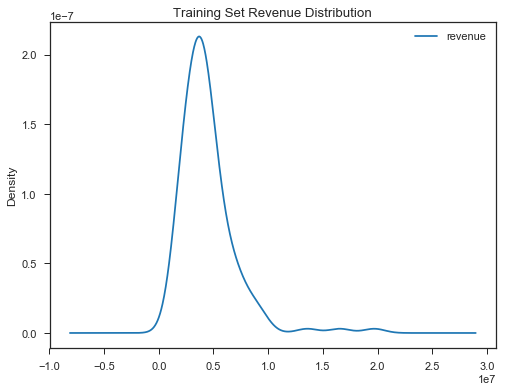

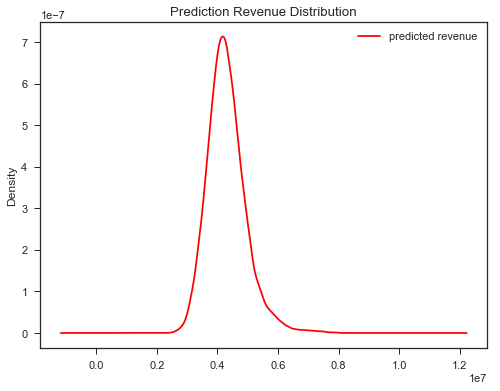

In [950]:
train[['revenue']].plot(kind='kde', title="Training Set Revenue Distribution")
submission.columns = ["predicted revenue"]
submission.plot(kind='kde', title="Prediction Revenue Distribution", color='red')